# Encoded representation layer recapitulates signal identified in raw data

## Visualized with t-SNE

Perform a t-sne on tybalt features to visualize if the latent layer recapitulates relationships observed through raw data t-sne.

In [80]:
import os
import pandas as pd
from sklearn import manifold
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# Load VAE feature activations per sample
encoded_file = os.path.join('Data2', 'encoded_rnaseq_onehidden_warmup_batchnorm.tsv')
encoded_df = pd.read_table(encoded_file, index_col=0)
encoded_df.head(2)

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
CHRF_RNA_0001_S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455941,0.0,0.12303,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
CHRF_RNA_0002_S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.133734,0.0,0.00000,0.0,0.0,1.918073,0.0,0.0,0.0,0.0


In [82]:
metadata = pd.read_csv("Data2/idseq_clinical_data.tsv", sep='\t', index_col = 0)
print(metadata.shape)
metadata_train = metadata.loc[encoded_df.index]
metadata_train.head()

(1143, 26)


,Project,Tissue,Sex,Infection,Immune Compromise,Organism,Age,sample_name,uploader,upload_date,...,ercc_reads,subsampled_fraction,quality_control,compression_ratio,tissue_type,nucleotide_type,location,host_genome,notes,sample_diagnosis
CHRF_RNA_0001_S1,CHRF,CSF,NaN,1,NaN,Streptococcus pneumoniae,PED,CHRF_RNA_0001_S1,NaN,3/25/18 17:51,...,33395452.0,1.000000,21.781,2.33,NaN,RNA,NaN,Human,"Parvovirus B19, Antigen for Strept. Pneumonia,...",Meningitis
CHRF_RNA_0002_S2,CHRF,CSF,NaN,1,NaN,Streptococcus pneumoniae,PED,CHRF_RNA_0002_S2,NaN,3/25/18 17:51,...,14875054.0,0.823954,35.690,1.47,NaN,RNA,NaN,Human,Streptococcus pneumoniae\n- Serotype: 2\n- CT ...,Meningitis
CHRF_RNA_0003_S3,CHRF,CSF,NaN,1,NaN,Streptococcus pneumoniae,PED,CHRF_RNA_0003_S3,NaN,3/25/18 17:51,...,17328160.0,1.000000,15.117,1.43,NaN,RNA,NaN,Human,low TTV\n- Serotype: 19A\n- CT value from qPCR...,Meningitis
CHRF_RNA_0004_S4,CHRF,CSF,NaN,1,NaN,Streptococcus pneumoniae,PED,CHRF_RNA_0004_S4,NaN,3/25/18 17:51,...,45038786.0,1.000000,38.742,2.70,NaN,RNA,NaN,Human,- Serotype: NTD\n- CT value from qPCR: 35.51\n...,Meningitis
CHRF_RNA_0005_S5,CHRF,CSF,NaN,1,NaN,Enterobacter hormaechei,PED,CHRF_RNA_0005_S5,NaN,3/25/18 17:51,...,23464986.0,1.000000,32.280,1.97,NaN,RNA,NaN,Human,"Enterobacter, 0 month old, CSF june 2016, 3500...",Meningitis


In [83]:
# Load Zero-One transformed (min-max scaled) RNAseq data
rnaseq_file = os.path.join('Data2', 'idseq_scaled_zeroone_rnaseq.tsv.gz')#'b_cells_human_counts.norm.mad.csv.gz')# '10x_scaled_zeroone_rnaseq.tsv.gz')
rnaseq_df = pd.read_table(rnaseq_file, index_col=0)
print(rnaseq_df.shape)
rnaseq_df.head(2)

(1143, 5000)


,11244,1868215,ENSG00000229807.9,586,Uncategorized,12059,12058,1903414,ENSG00000067048.16,ENSG00000202198.1,...,ENSG00000042317.16,ENSG00000117215.14,ENSG00000149179.13,ENSG00000018699.11,ENSG00000112742.9,ENSG00000116649.9,ENSG00000119227.7,ENSG00000141698.16,ENSG00000103811.15,ENSG00000100234.11
CHRF_RNA_0001_S1,0.0,0.0,0.476274,0.014692,0.623816,0.0,0.005011,0.018620,0.423272,0.396269,...,0.684292,0.804572,0.837691,0.733657,0.676144,0.705043,0.758952,0.719158,0.688606,0.76363
CHRF_RNA_0002_S2,0.0,0.0,0.436772,0.002053,0.461708,0.0,0.000000,0.005042,0.437189,0.348781,...,0.846956,0.506130,0.674280,0.905055,0.977248,0.512239,0.543441,0.519312,0.547809,0.58246


In [84]:
# TAKE THE SUBSET OF SAMPLES THAT ARE PRESENT IN METADATA AND IN THE FINAL FILE
# TODO - should probably do this in the data processing script

encoded_df = encoded_df.loc[metadata_train.index]
print(encoded_df.shape)

(1143, 50)


In [85]:
color_dict = dict(zip( list(set(metadata['Project'])) ,sns.color_palette("hls", len(set(metadata['Project'])))))
patches = [ mpatches.Patch(color=color_dict[i], label=i ) for i in color_dict.keys() ]
color_dict
metadata = metadata['Project']
#metadata = ['-'.join(i.split('-')[1:len(i.split('-'))]) for i in rnaseq_df.index]
#metadata = ['-'.join(i.split('.')[1]) for i in rnaseq_df.index]
#metadata = [1 for i in rnaseq_df.index]
#set(metadata)
#color_dict = dict(zip( list(set(metadata)) ,sns.color_palette("hls", len(set(metadata)))))
#patches = [ mpatches.Patch(color=color_dict[i], label=i ) for i in color_dict.keys() ]

In [86]:
rnaseq_df.head()

,11244,1868215,ENSG00000229807.9,586,Uncategorized,12059,12058,1903414,ENSG00000067048.16,ENSG00000202198.1,...,ENSG00000042317.16,ENSG00000117215.14,ENSG00000149179.13,ENSG00000018699.11,ENSG00000112742.9,ENSG00000116649.9,ENSG00000119227.7,ENSG00000141698.16,ENSG00000103811.15,ENSG00000100234.11
CHRF_RNA_0001_S1,0.0,0.0,0.476274,0.014692,0.623816,0.0,0.005011,0.018620,0.423272,0.396269,...,0.684292,0.804572,0.837691,0.733657,0.676144,0.705043,0.758952,0.719158,0.688606,0.763630
CHRF_RNA_0002_S2,0.0,0.0,0.436772,0.002053,0.461708,0.0,0.000000,0.005042,0.437189,0.348781,...,0.846956,0.506130,0.674280,0.905055,0.977248,0.512239,0.543441,0.519312,0.547809,0.582460
CHRF_RNA_0003_S3,0.0,0.0,0.316257,0.000000,0.611845,0.0,0.000000,0.010596,0.285203,0.231835,...,0.622641,0.623238,0.611058,0.662186,0.694747,0.592031,0.609300,0.536964,0.569926,0.668549
CHRF_RNA_0004_S4,0.0,0.0,0.316257,0.000000,0.805082,0.0,0.000000,0.018711,0.285203,0.193021,...,0.515906,0.328762,0.585463,0.562587,0.445714,0.401458,0.219386,0.499695,0.457387,0.416697
CHRF_RNA_0005_S5,0.0,0.0,0.325707,0.000000,0.661640,0.0,0.000000,0.007817,0.122157,0.368051,...,0.492910,0.497464,0.528855,0.676977,0.660858,0.334246,0.307947,0.465452,0.414416,0.531683


In [87]:
# Perform t-SNE on VAE encoded_features
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                     learning_rate=300, n_iter=200)
tsne_out = tsne.fit_transform(encoded_df)
tsne_out = pd.DataFrame(tsne_out, columns=['1', '2'])
tsne_out.index = encoded_df.index
tsne_out.index.name = 'tcga_id'
tsne_out_file = os.path.join('results', 'tybalt_tsne_features.tsv')
tsne_out.to_csv(tsne_out_file, sep='\t')
tsne_out.head(2)

,1,2
tcga_id,,
CHRF_RNA_0001_S1,-13.990483,5.456124
CHRF_RNA_0002_S2,-10.566410,9.909004


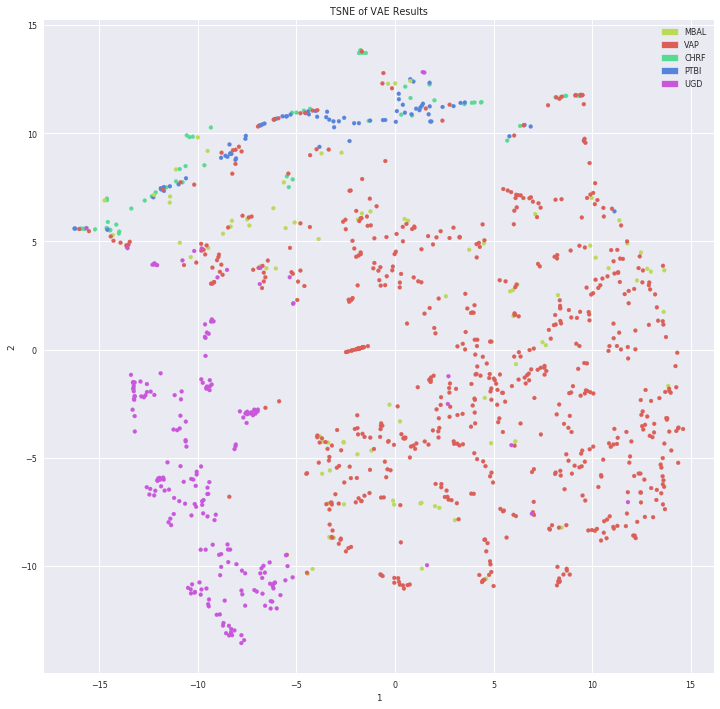

In [88]:
tsne_out.plot.scatter('1','2', figsize=(12,12), s=15, color=[color_dict[i] for i in metadata] ) #[['red','blue'][int(i)] for i in (rnaseq_df[rnaseq_df.columns[['flu' in i for i in rnaseq_df.columns]]].sum(axis=1) > 0)])# 
plt.title("TSNE of VAE Results")
plt.legend(handles = patches)
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/TSNE_VAE_50LV.pdf')

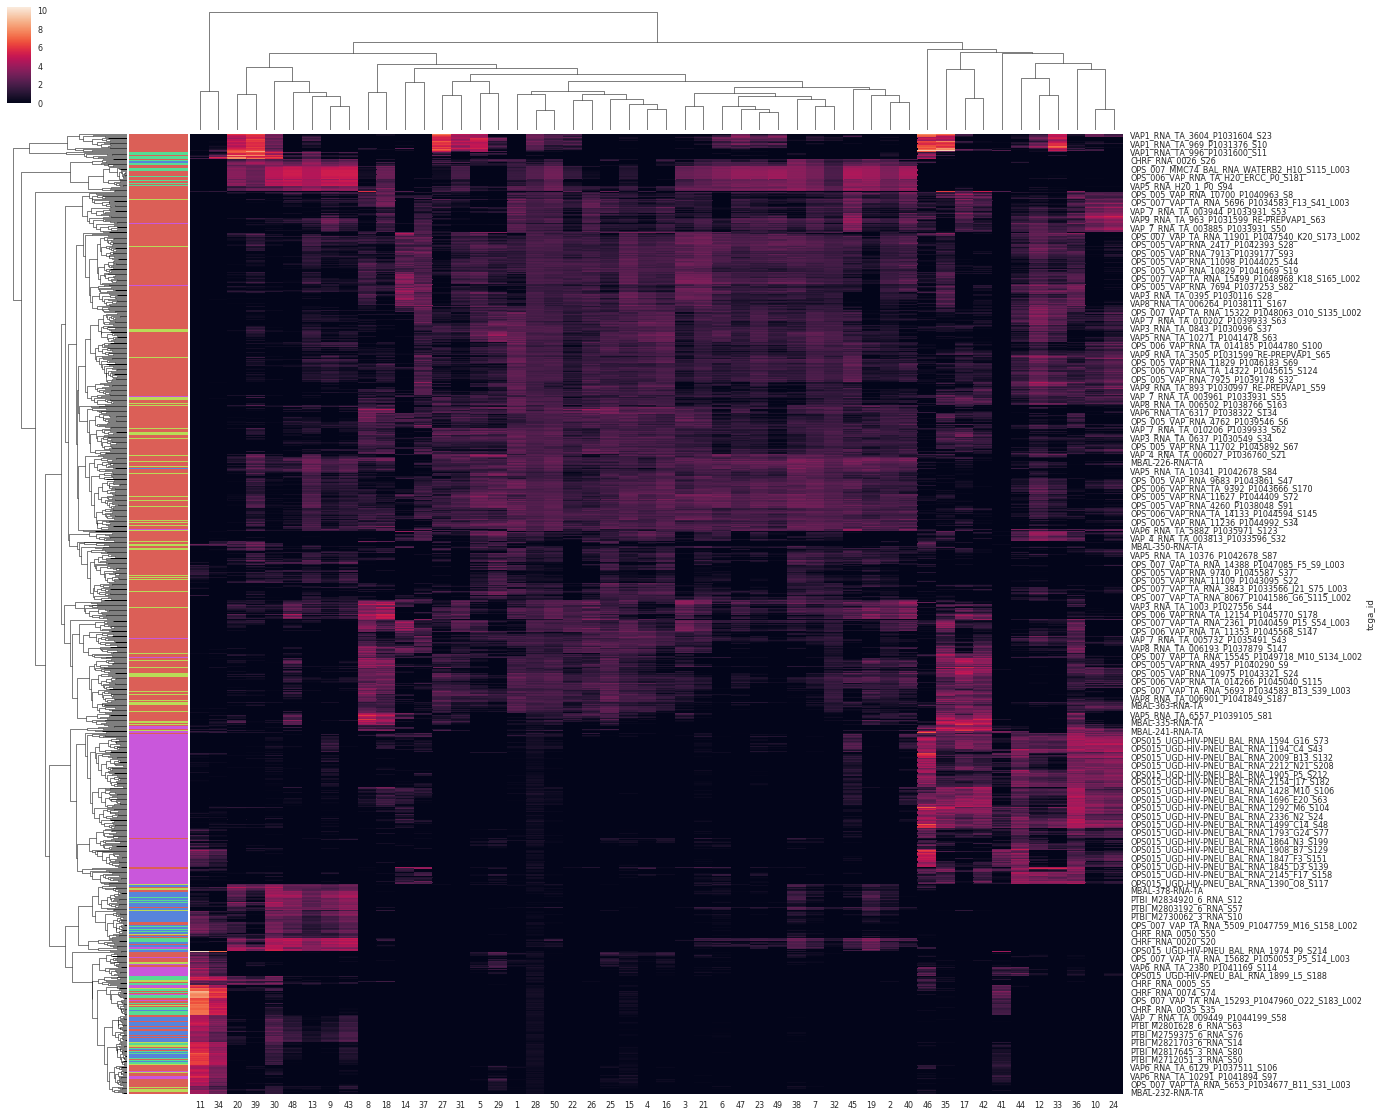

In [89]:
sns.set(font_scale=.8)
sns.clustermap(encoded_df, figsize=(20, 20), 
               row_colors=[[color_dict[i] for i in metadata]])
#metadata = ['-'.join(i.split('-')[1:len(i.split('-'))]) for i in rnaseq_df.index]
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/feature_activations_50LV.pdf')

In [90]:
'''# PLOT JUST THE INFECTED CELLS
DF = pd.concat([encoded_df.loc[rnaseq_df.index[rnaseq_df[rnaseq_df.columns[['RSV' in i for i in rnaseq_df.columns]]].sum(axis=1) > 0]], 
               encoded_df.loc[rnaseq_df.index[rnaseq_df[rnaseq_df.columns[['RSV' in i for i in rnaseq_df.columns]]].sum(axis=1) == 0]]])

DF = encoded_df.loc[rnaseq_df.index[rnaseq_df[rnaseq_df.columns[['RSV' in i for i in rnaseq_df.columns]]].sum(axis=1) > 0]]
print(DF.shape)
virus_ids = list(rnaseq_df.index[rnaseq_df[rnaseq_df.columns[['RSV' in i for i in rnaseq_df.columns]]].sum(axis=1) > 0])
colors = [['blue','red'][i in virus_ids] for i in DF.index]
sns.clustermap(DF, figsize=(20,20),row_colors = [[color_dict['-'.join(i.split('.')[1])] for i in DF.index], colors])#, row_cluster = False)

'''


"# PLOT JUST THE INFECTED CELLS\nDF = pd.concat([encoded_df.loc[rnaseq_df.index[rnaseq_df[rnaseq_df.columns[['RSV' in i for i in rnaseq_df.columns]]].sum(axis=1) > 0]], \n               encoded_df.loc[rnaseq_df.index[rnaseq_df[rnaseq_df.columns[['RSV' in i for i in rnaseq_df.columns]]].sum(axis=1) == 0]]])\n\nDF = encoded_df.loc[rnaseq_df.index[rnaseq_df[rnaseq_df.columns[['RSV' in i for i in rnaseq_df.columns]]].sum(axis=1) > 0]]\nprint(DF.shape)\nvirus_ids = list(rnaseq_df.index[rnaseq_df[rnaseq_df.columns[['RSV' in i for i in rnaseq_df.columns]]].sum(axis=1) > 0])\ncolors = [['blue','red'][i in virus_ids] for i in DF.index]\nsns.clustermap(DF, figsize=(20,20),row_colors = [[color_dict['-'.join(i.split('.')[1])] for i in DF.index], colors])#, row_cluster = False)\n\n"

In [91]:
'''# Perform t-SNE on ADAGE encoded_features
tsne_adage = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                           learning_rate=300, n_iter=400)
tsne_adage_out = tsne_adage.fit_transform(adage_df)
tsne_adage_out = pd.DataFrame(tsne_adage_out, columns=['1', '2'])
tsne_adage_out.index = adage_df.index
tsne_adage_out.index.name = 'tcga_id'
tsne_adage_out_file = os.path.join('results', 'adage_tsne_features.tsv')
tsne_adage_out.to_csv(tsne_adage_out_file, sep='\t')
tsne_adage_out.head(2)'''

"# Perform t-SNE on ADAGE encoded_features\ntsne_adage = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,\n                           learning_rate=300, n_iter=400)\ntsne_adage_out = tsne_adage.fit_transform(adage_df)\ntsne_adage_out = pd.DataFrame(tsne_adage_out, columns=['1', '2'])\ntsne_adage_out.index = adage_df.index\ntsne_adage_out.index.name = 'tcga_id'\ntsne_adage_out_file = os.path.join('results', 'adage_tsne_features.tsv')\ntsne_adage_out.to_csv(tsne_adage_out_file, sep='\t')\ntsne_adage_out.head(2)"

In [92]:
# Perform t-SNE on zero-one RNAseq features
tsne_rna = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                         learning_rate=300, n_iter=200)
tsne_rna_out = tsne_rna.fit_transform(rnaseq_df)
tsne_rna_out = pd.DataFrame(tsne_rna_out, columns=['1', '2'])
tsne_rna_out.index = rnaseq_df.index
tsne_rna_out.index.name = 'tcga_id'
tsne_rna_out_file = os.path.join('results', 'rnaseq_tsne_features.tsv')
tsne_rna_out.to_csv(tsne_rna_out_file, sep='\t')
tsne_rna_out.head(2)

,1,2
tcga_id,,
CHRF_RNA_0001_S1,31.613958,-4.909651
CHRF_RNA_0002_S2,26.115744,-6.001728


In [93]:
#metadata = pd.read_csv("Data/idseq_clinical_data.tsv", sep='\t', index_col = 0)

In [94]:
#rnaseq_df = rnaseq_df.loc[metadata.index]

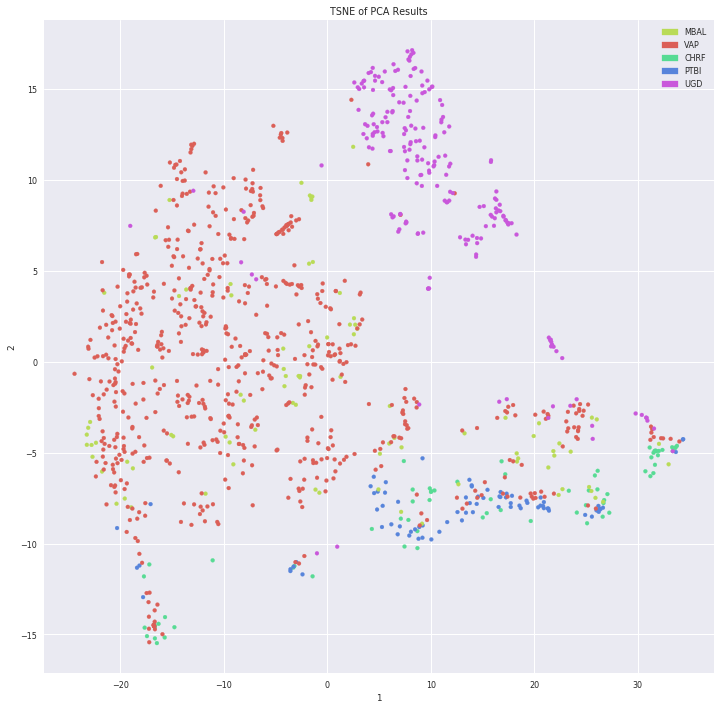

In [95]:
tsne_rna_out.plot.scatter('1','2', figsize=(12,12), s=15, color=[color_dict[i] for i in metadata] )
plt.title("TSNE of PCA Results")
plt.legend(handles = patches)
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/TSNE_PCA_50LV.pdf')

In [63]:
# Example of node activation distribution for the first two latent features
plt.figure(figsize=(10, 10))
F1 = 21
F2 = 23
plt.scatter(encoded_df.iloc[:, (F1-1)], encoded_df.iloc[:, (F2-1)],alpha=.4, color=[color_dict[i.split('.')[1]] for i in encoded_df.index])#['Project']]) #[['red','blue'][int(i)] for i in (rnaseq_df[rnaseq_df.columns[['flu' in i for i in rnaseq_df.columns]]].sum(axis=1) > 0)])#
plt.xlabel('Latent Feature '+str(F1))
plt.ylabel('Latent Feature '+str(F2));

plt.legend(handles = patches)

IndexError: list index out of range

In [ ]:
# Example of node activation distribution for the first two latent features
plt.figure(figsize=(10, 10))
plt.scatter(encoded_df.iloc[:, 11], encoded_df.iloc[:, 20])#, color=[color_dict[i] for i in metadata['Project']])
#plt.xlabel('Latent Feature 1')
#plt.xlabel('Latent Feature 2');